#### 2023/11/09 ABCとsaito先生の紙箱と紙袋をとりあえず入れてみる(AD:Anomaly Detection)

In [1]:
from preprocessed_data import PreprocessedData
# デッサンのID
drawing_id = 1
# 前処理したデータ
data = PreprocessedData(drawing_id)
# データの可視化
data.draw_allstroke()

In [3]:
# url_box = ['http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2013/5-13/20130513140841_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2013/5-27/20130527135304_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2013/4-18/20130417141022_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2013/5-13/20130513113848_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2013/5-27/20130527122833_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2015/4-16/20150416145732_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2015/4-27/20150427114455_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/2015/5-15/20150515161811_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/w3kbko/5nur0x/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/i0zjtz/paper_bag_expert/20180215013255_18-4-0-0-0_strokes.txt/strokes/pointlists',
#         'http://skill.shinshu-u.ac.jp/i0zjtz/paper_bag_expert/20211130185130_18-4-0-0-0_strokes.txt/strokes/pointlists'
#          ]
# url_bag = ['http://skill.shinshu-u.ac.jp/2013/6-10/20130610135043_18-4-0-0-0_strokes.txt/strokes/pointlists',
#          'http://skill.shinshu-u.ac.jp/2013/6-24/20130624135832_18-4-0-0-0_strokes.txt/strokes/pointlists',         
#          'http://skill.shinshu-u.ac.jp/2013/7-9/20130709145156_18-4-0-0-0_strokes.txt/strokes/pointlists',
#          'http://skill.shinshu-u.ac.jp/2013/6-10/20130610115808_18-4-0-0-0_strokes.txt/strokes/pointlists',
#          'http://skill.shinshu-u.ac.jp/2013/6-24/20130624115420_18-4-0-0-0_strokes.txt/strokes/pointlists',
#          'http://skill.shinshu-u.ac.jp/2013/7-9/20130709145729_18-4-0-0-0_strokes.txt/strokes/pointlists',
#          'http://skill.shinshu-u.ac.jp/2015/5-29/20150529155148_18-4-0-0-0_strokes.txt/strokes/pointlists',
#          'http://skill.shinshu-u.ac.jp/2015/6-12/20150612161428_18-4-0-0-0_strokes.txt/strokes/pointlists',
#          'http://skill.shinshu-u.ac.jp/w3kbko/nppqej/strokes/pointlists'
#          ]
# rotate_type_box = [180, 0, 0,
#                    0, 180, 0,
#                    180, 180, 0,
#                    0, 0, 0
#                    ]
# rotate_type_bag = [90, 180, 0,
#                    90, 270, 180,
#                    0, 0,
#                    90
#                    ]
# data_box = [PreprocessDataPlusInfo(url, r) for url, r in zip(url_box, rotate_type_box)]
# data_bag = [PreprocessDataPlusInfo(url, r) for url, r in zip(url_bag, rotate_type_bag)]

# for data in data_box:
#     data.draw_allstroke()
    
# for data in data_bag:
#     data.draw_allstroke()

# df_box_pt = pd.concat([data.df_addinfo for data in data_box])
# df_box = df_box_pt[df_box_pt['shape_int'] != 0]
# img_vector_box = df_box['140*140_img_vector'].to_list()
# img_vector_box = np.array(img_vector_box)

# df_bag_pt = pd.concat([data.df_addinfo for data in data_bag])
# df_bag = df_bag_pt[df_bag_pt['shape_int'] != 0]
# img_vector_bag = df_bag['140*140_img_vector'].to_list()
# img_vector_bag = np.array(img_vector_bag)

In [2]:
df_box = pd.read_pickle('../temp/abcs_box_nopt.pkl')
img_vector_box = df_box['140*140_img_vector'].to_list()
img_vector_box = np.array(img_vector_box)

In [12]:
num = 5000
# df_box_sample = df_box.copy().sample(n=num)
df_box_sample = df_box.copy()
img_vector_box_sample = df_box_sample['140*140_img_vector'].to_list()
img_vector_box_sample = np.array(img_vector_box_sample)

#### ▶ t-SNE

In [38]:
from sklearn.manifold import TSNE

# 圧縮
tsne_model = TSNE(n_components=2, random_state = 0, perplexity = 10, n_iter = 1000)
tsne_result = tsne_model.fit_transform(img_vector_box_sample)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


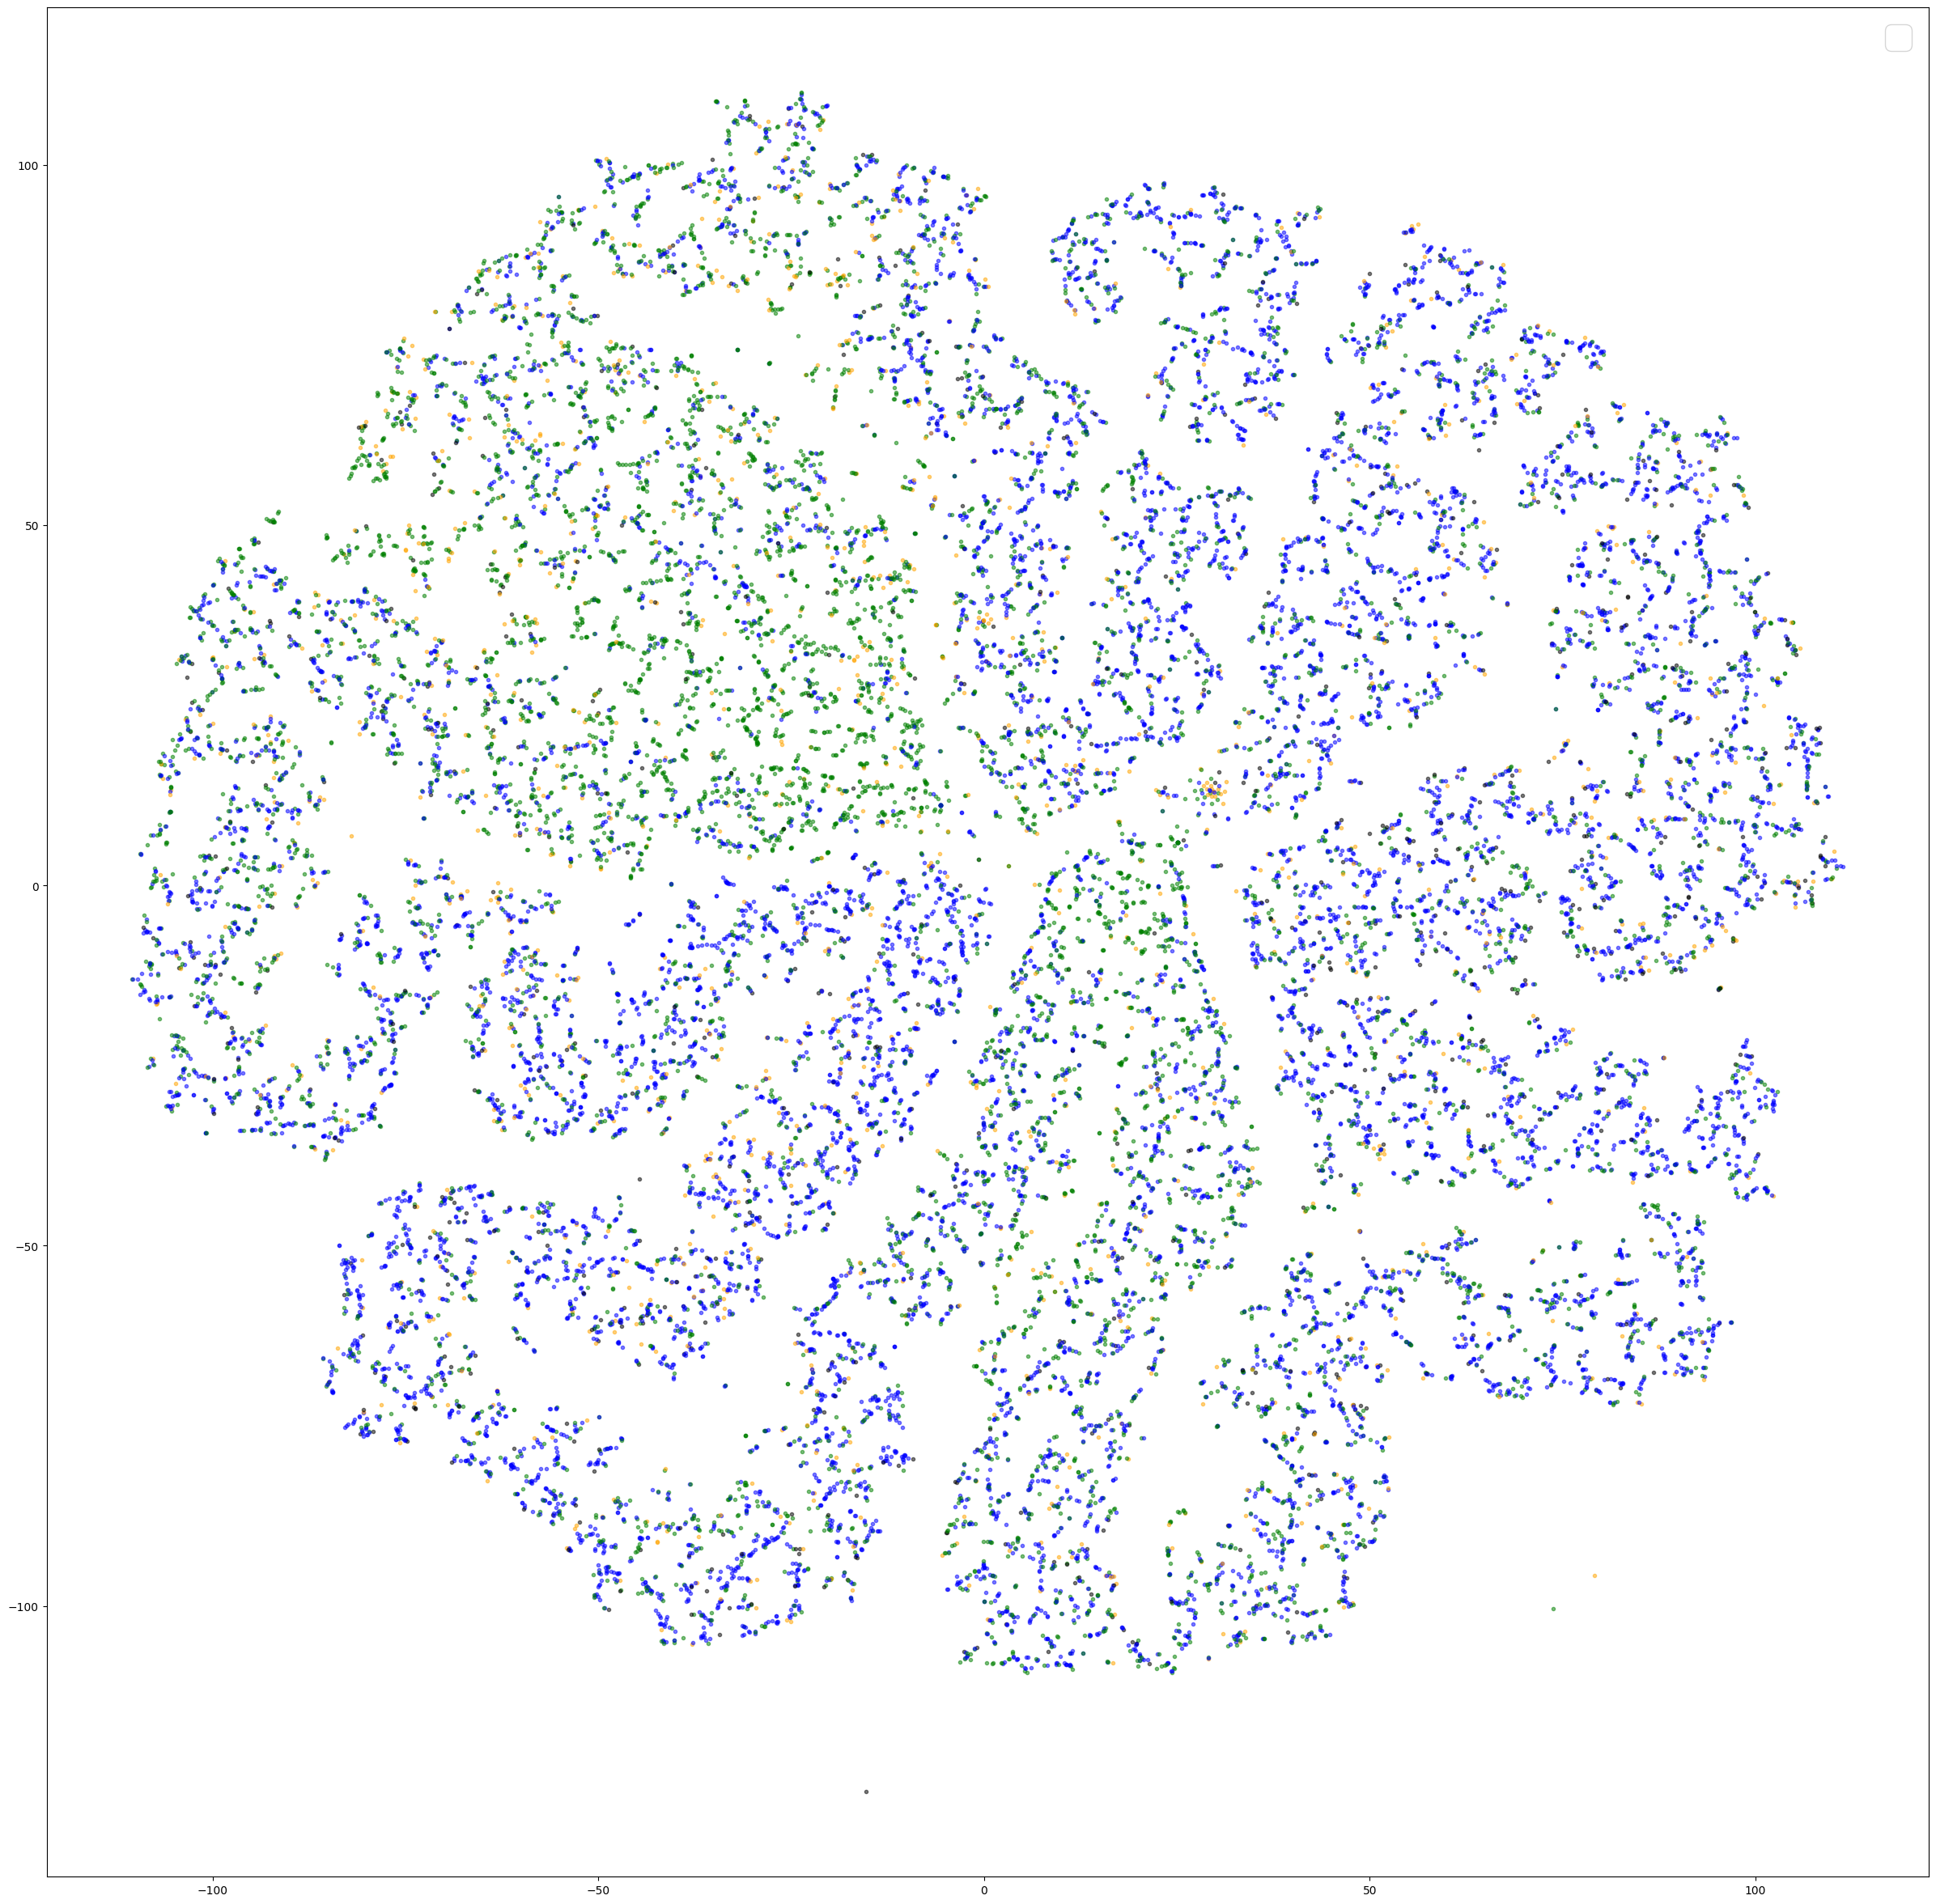

In [39]:
# 可視化
df_box_sample['tsne_ax0'] = tsne_result[:, 0:1]
df_box_sample['tsne_ax1'] = tsne_result[:, 1:2]

colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

for shape_int, col0, col1 in zip(df_box_sample['shape_int'], df_box_sample['tsne_ax0'], df_box_sample['tsne_ax1']):
    plt.scatter(col0, col1, color=colors[shape_int], alpha=0.5, marker='.')

plt.legend(fontsize = 30)

#### ▶ UMAP

In [32]:
import umap
# 圧縮
mapper = umap.UMAP(n_components=2,
                   n_neighbors=10,
                   random_state=0)

umap_result = mapper.fit_transform(img_vector_box_sample)

c:\Users\ispec\MyWorkSpace\python\drawing_2023_windows\.venv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


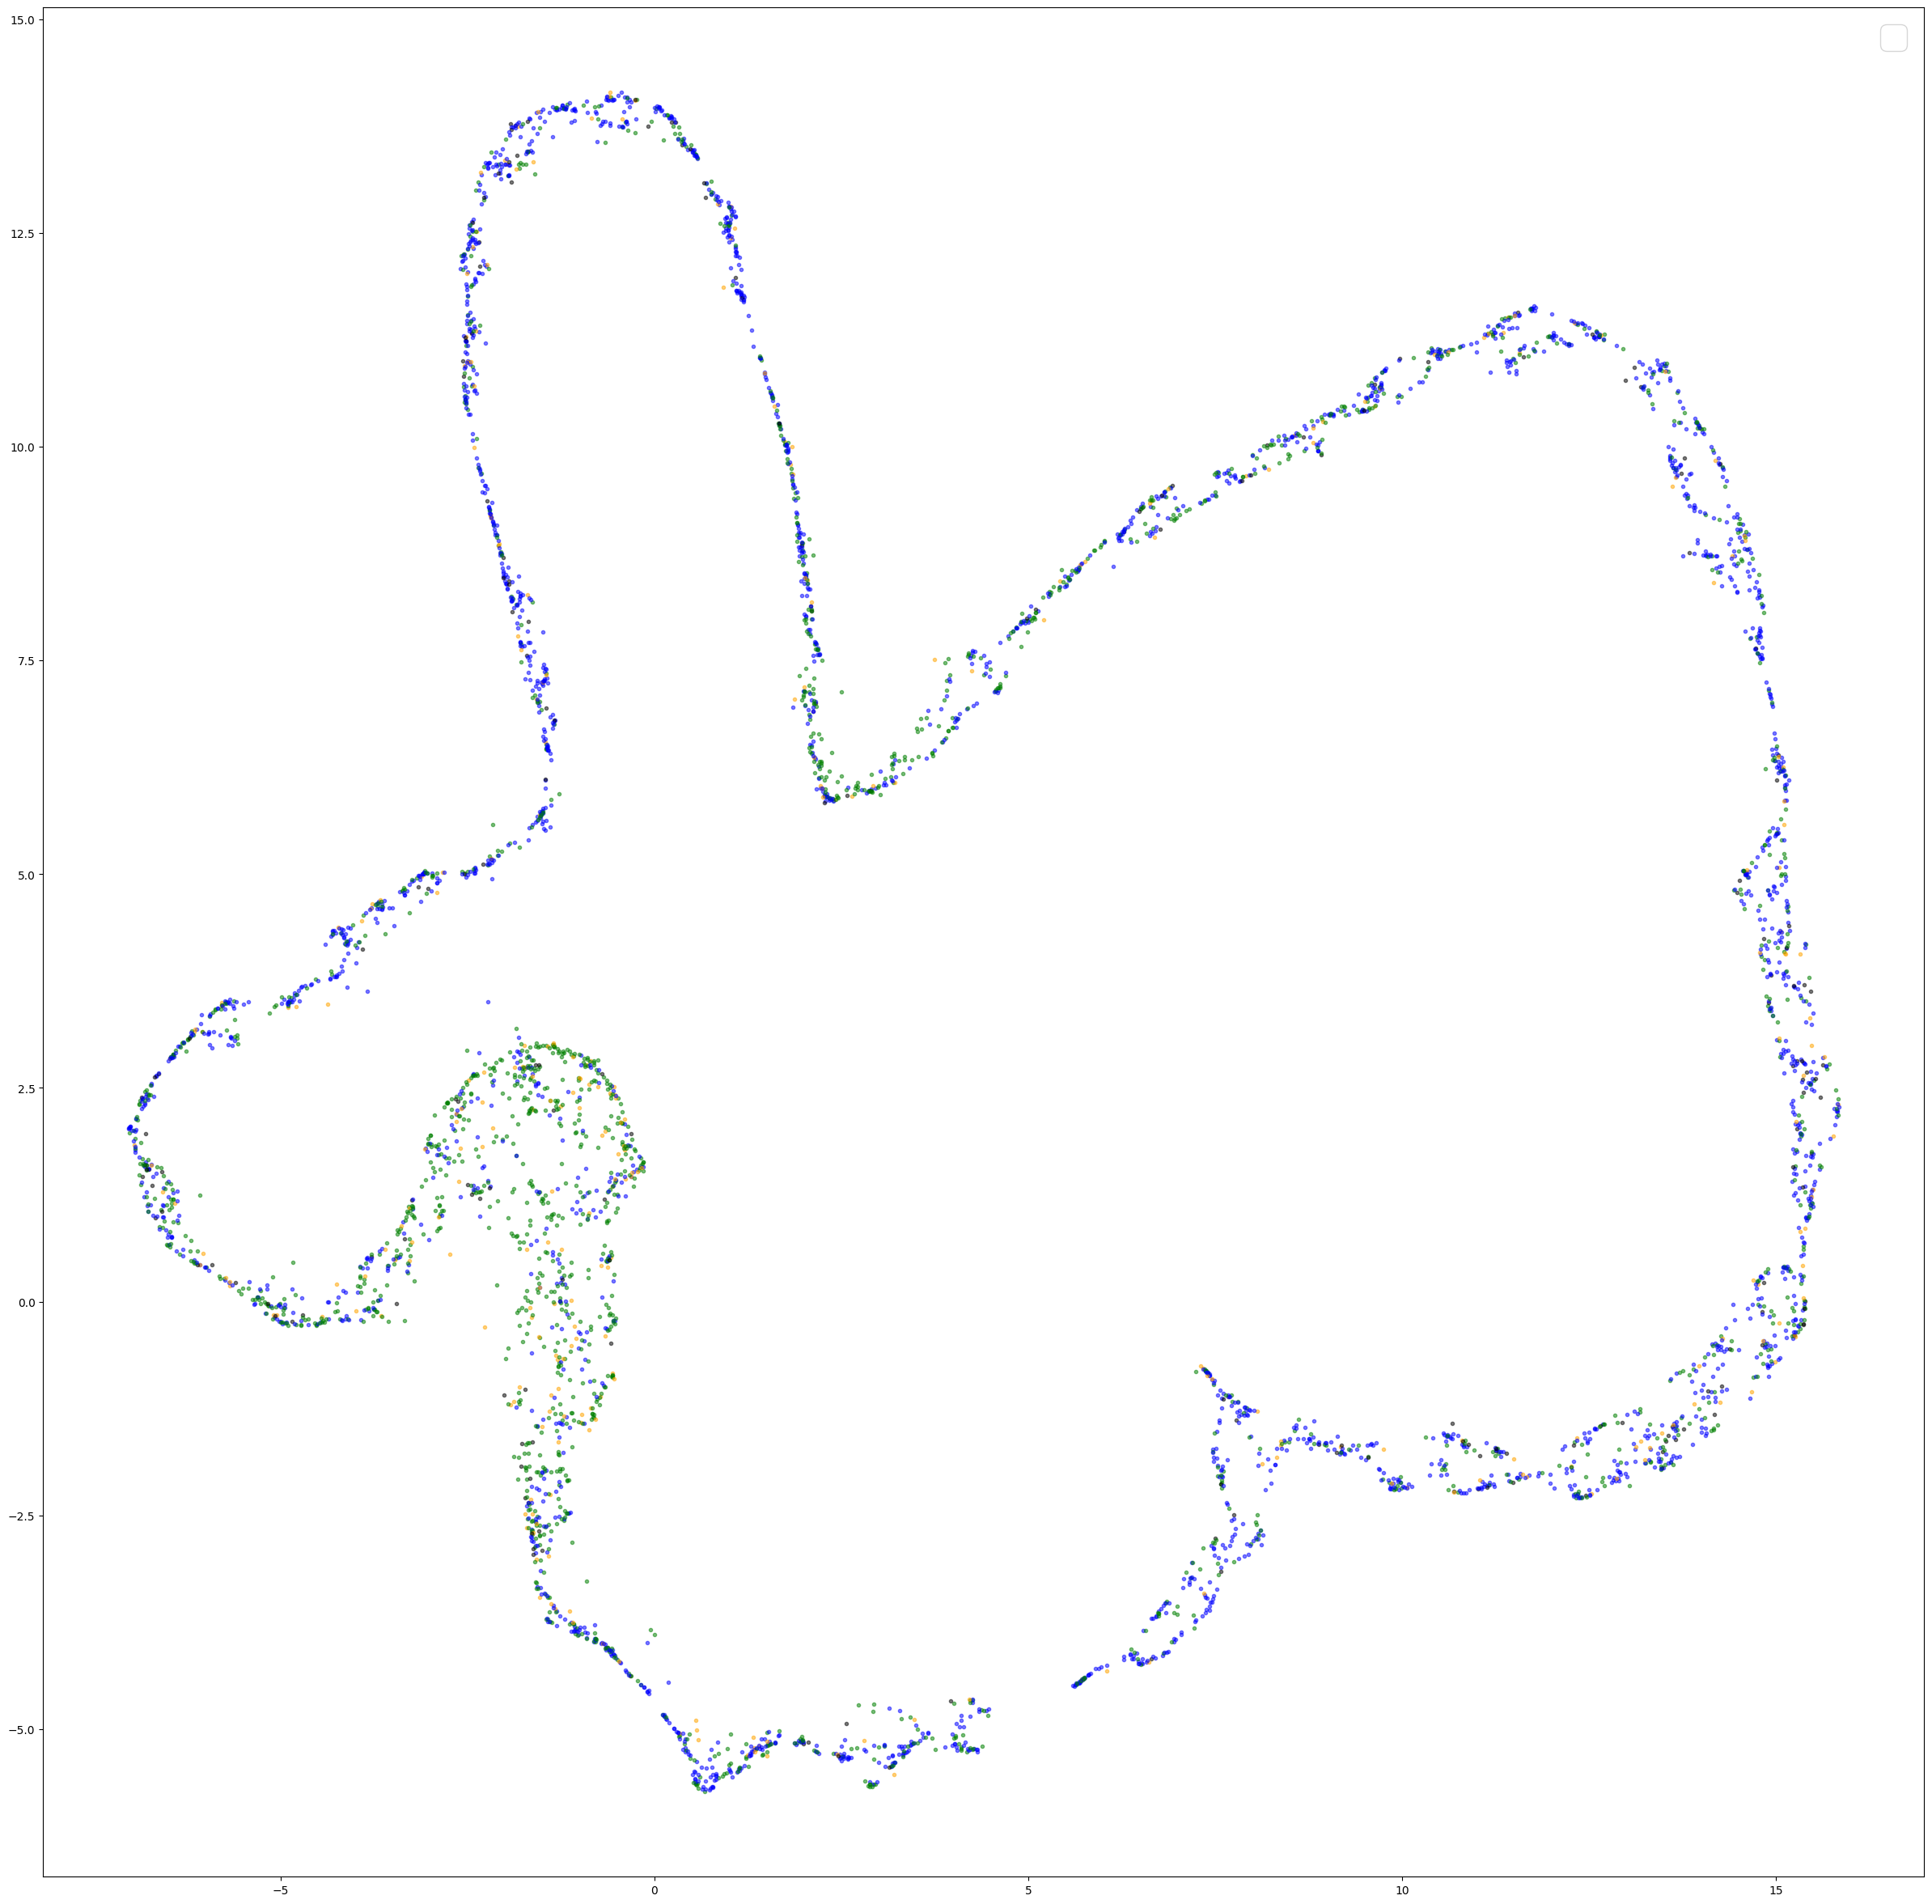

In [33]:
# 可視化
df_box_sample['umap_ax0'] = umap_result[:, 0:1]
df_box_sample['umap_ax1'] = umap_result[:, 1:2]

colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

for shape_int, col0, col1 in zip(df_box_sample['shape_int'], df_box_sample['umap_ax0'], df_box_sample['umap_ax1']):
    plt.scatter(col0, col1, color=colors[shape_int], alpha=0.5, marker='.')

plt.legend(fontsize = 30)

#### ▶ 各線種の割合を算出

In [4]:
import sklearn

df_box_st = df_box[df_box['shape_int'] == 1]
df_box_cu = df_box[df_box['shape_int'] == 2]
df_box_co = df_box[df_box['shape_int'] == 3]
df_box_ha = df_box[df_box['shape_int'] == 4]

print('直線  :', len(df_box_st))
print('曲線  :', len(df_box_cu))
print('複雑線:', len(df_box_co))
print('ハッチング:', len(df_box_ha))

# 線種ごとのデータ数の最小値942(hatching)で統一
num = 942
seed = 1

df_box_st_sample = df_box_st.sample(n=942, random_state=seed)
df_box_cu_sample = df_box_cu.sample(n=942, random_state=seed)
df_box_co_sample = df_box_co.sample(n=942, random_state=seed)
df_box_ha_sample = df_box_ha.sample(n=942, random_state=seed)

df_box_shape_ratio = pd.concat([df_box_st_sample, df_box_cu_sample, df_box_co_sample, df_box_ha_sample], axis=0)

df_box_random_shape = sklearn.utils.shuffle(df_box_shape_ratio, random_state=seed)

img_vector_box_random = df_box_random_shape['140*140_img_vector'].to_list()
img_vector_box_random = np.array(img_vector_box_random)



# x軸
x_box_random = np.array(df_box_random_shape['ptx_mm_slide_expand'].to_list())

# y軸
y_box_random = np.array(df_box_random_shape['pty_mm_slide_expand'].to_list())

xy_box_random = np.array([ np.concatenate([x, y]) for x, y in zip(x_box_random, y_box_random)])


直線  : 12257
曲線  : 8886
複雑線: 1450
ハッチング: 942


In [5]:
# 圧縮
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state = 0, perplexity = 10, n_iter = 1000)
tsne_result = tsne_model.fit_transform(xy_box_random)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


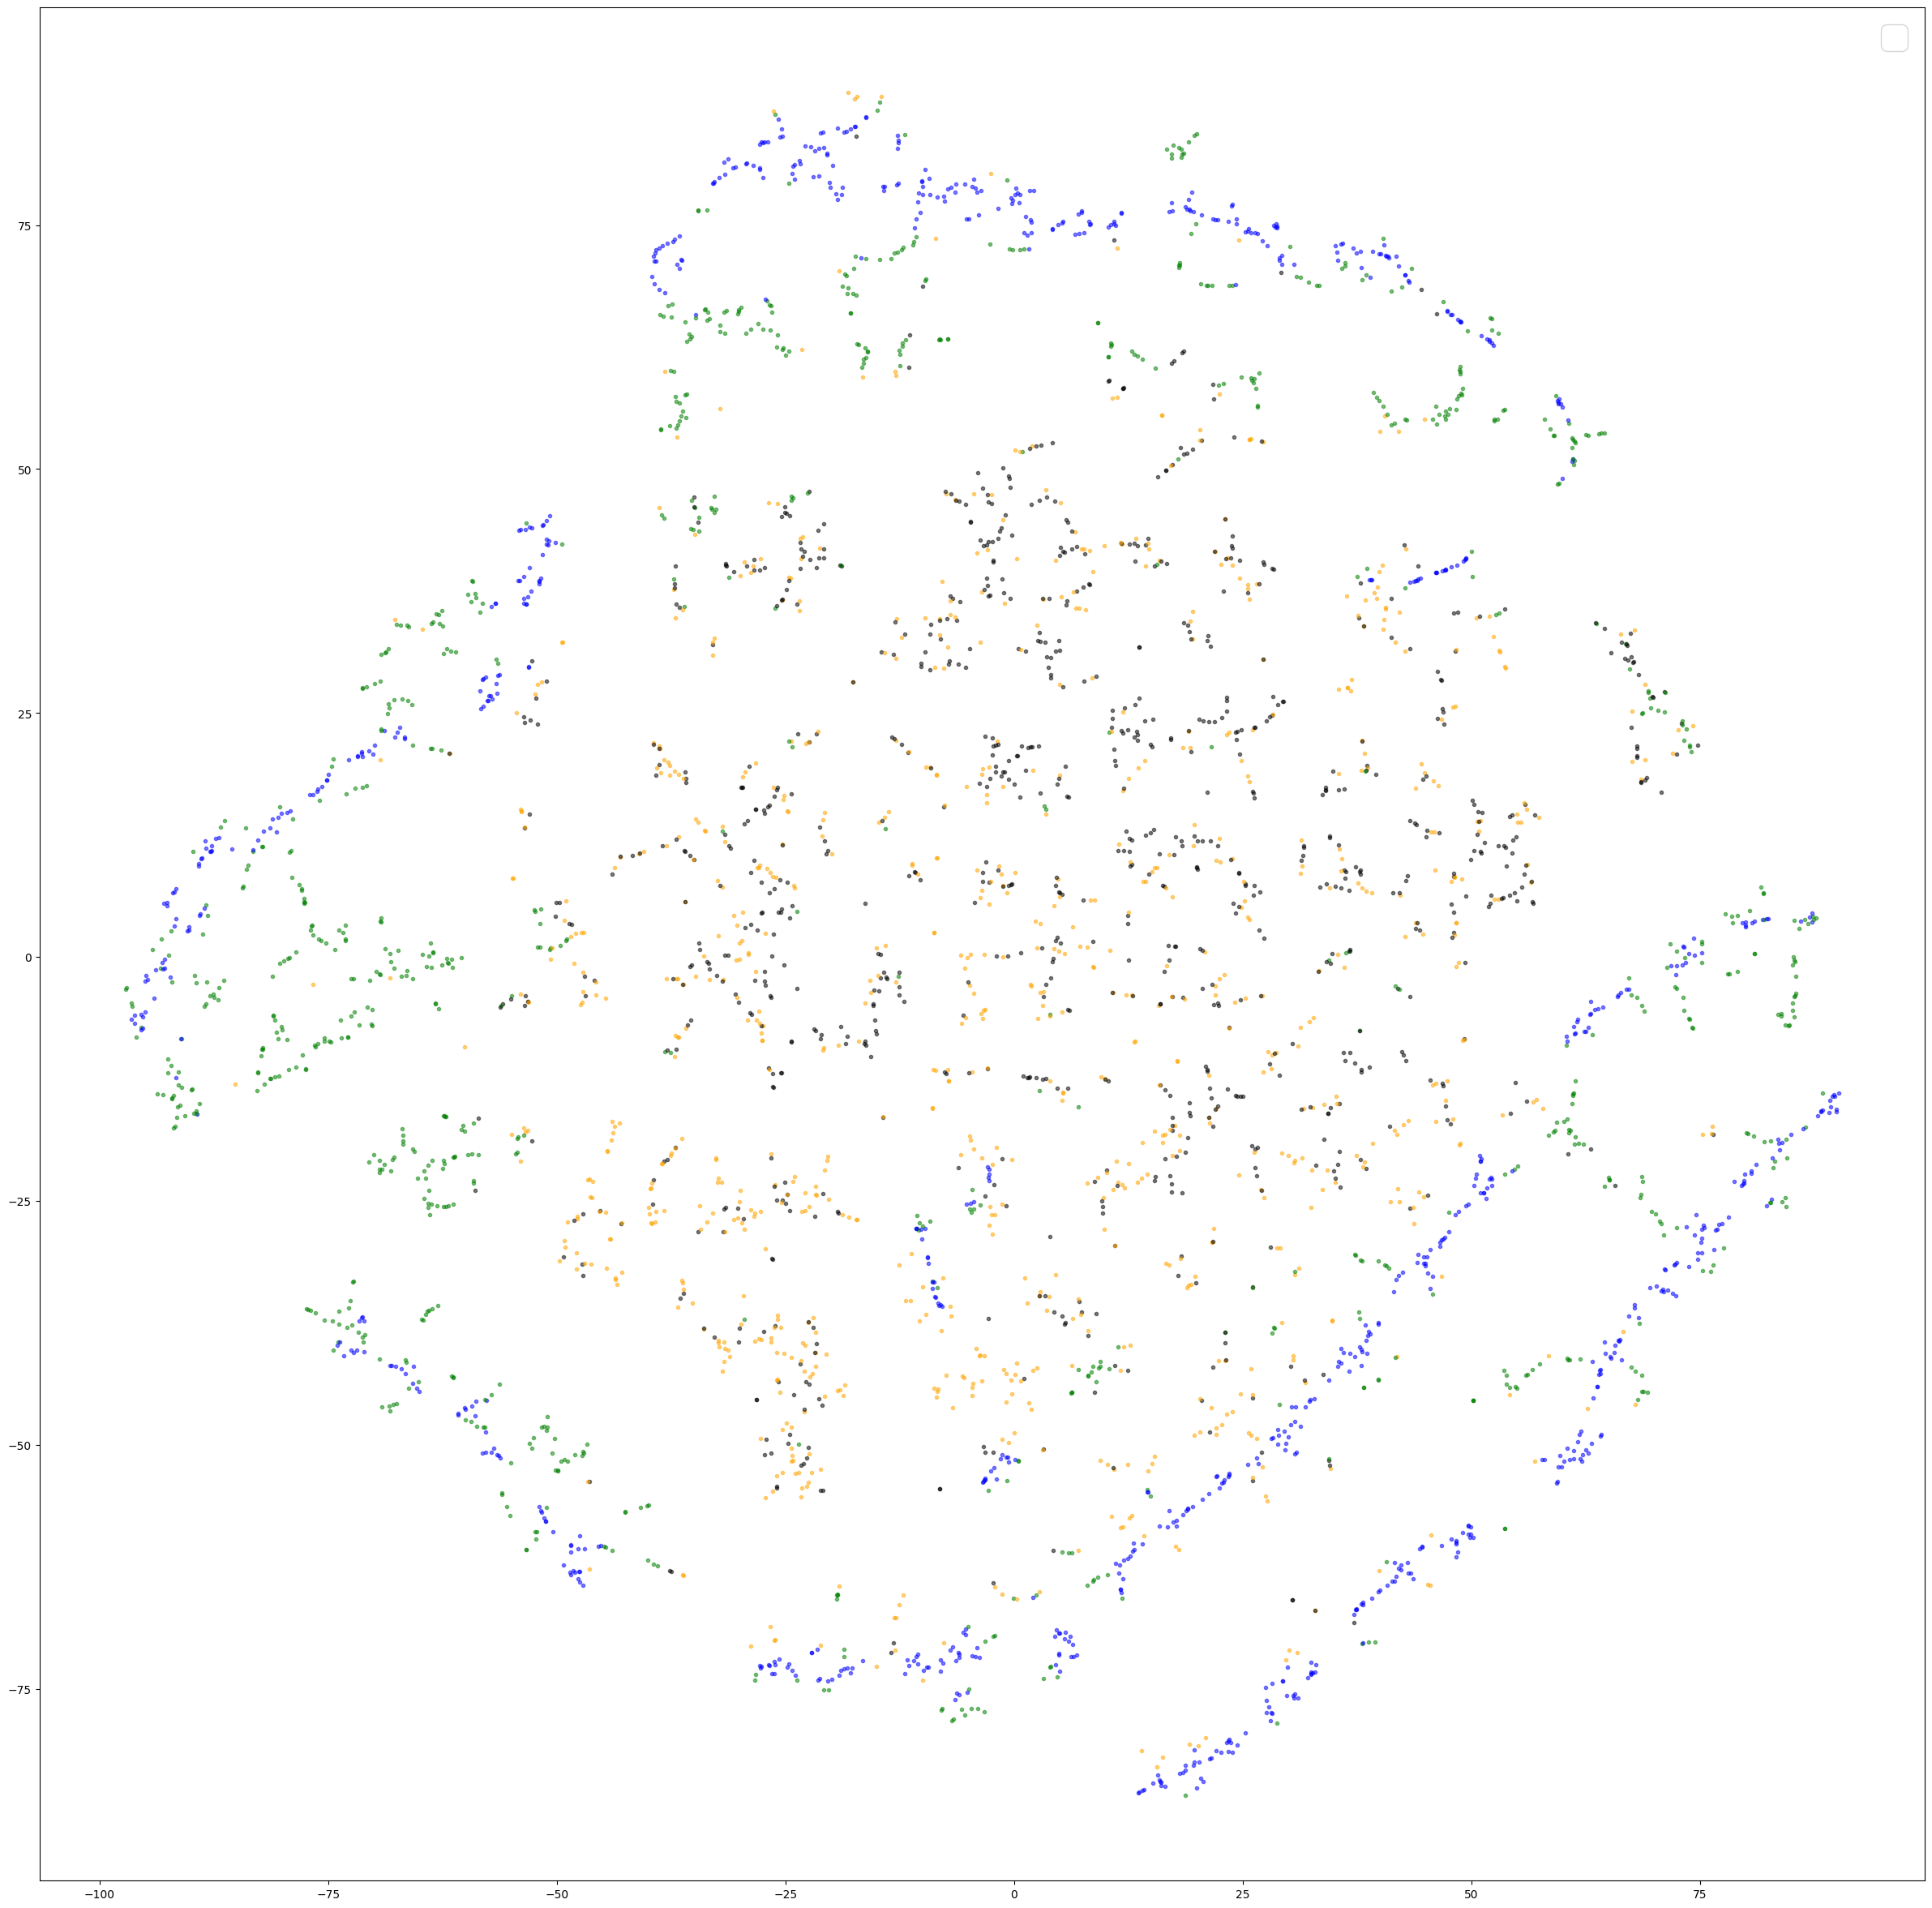

In [8]:
# 可視化
df_box_random_shape['axis0'] = tsne_result[:, 0:1]
df_box_random_shape['axis1'] = tsne_result[:, 1:2]

colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

for shape_int, col0, col1 in zip(df_box_random_shape['shape_int'], df_box_random_shape['tsne_ax0'], df_box_random_shape['tsne_ax1']):
    plt.scatter(col0, col1, color=colors[shape_int], alpha=0.5, marker='.')

plt.legend(fontsize = 30)

In [10]:
import umap
# 圧縮
mapper = umap.UMAP(n_components=2,
                   n_neighbors=10,
                   random_state=0)

umap_result = mapper.fit_transform(xy_box_random)

c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


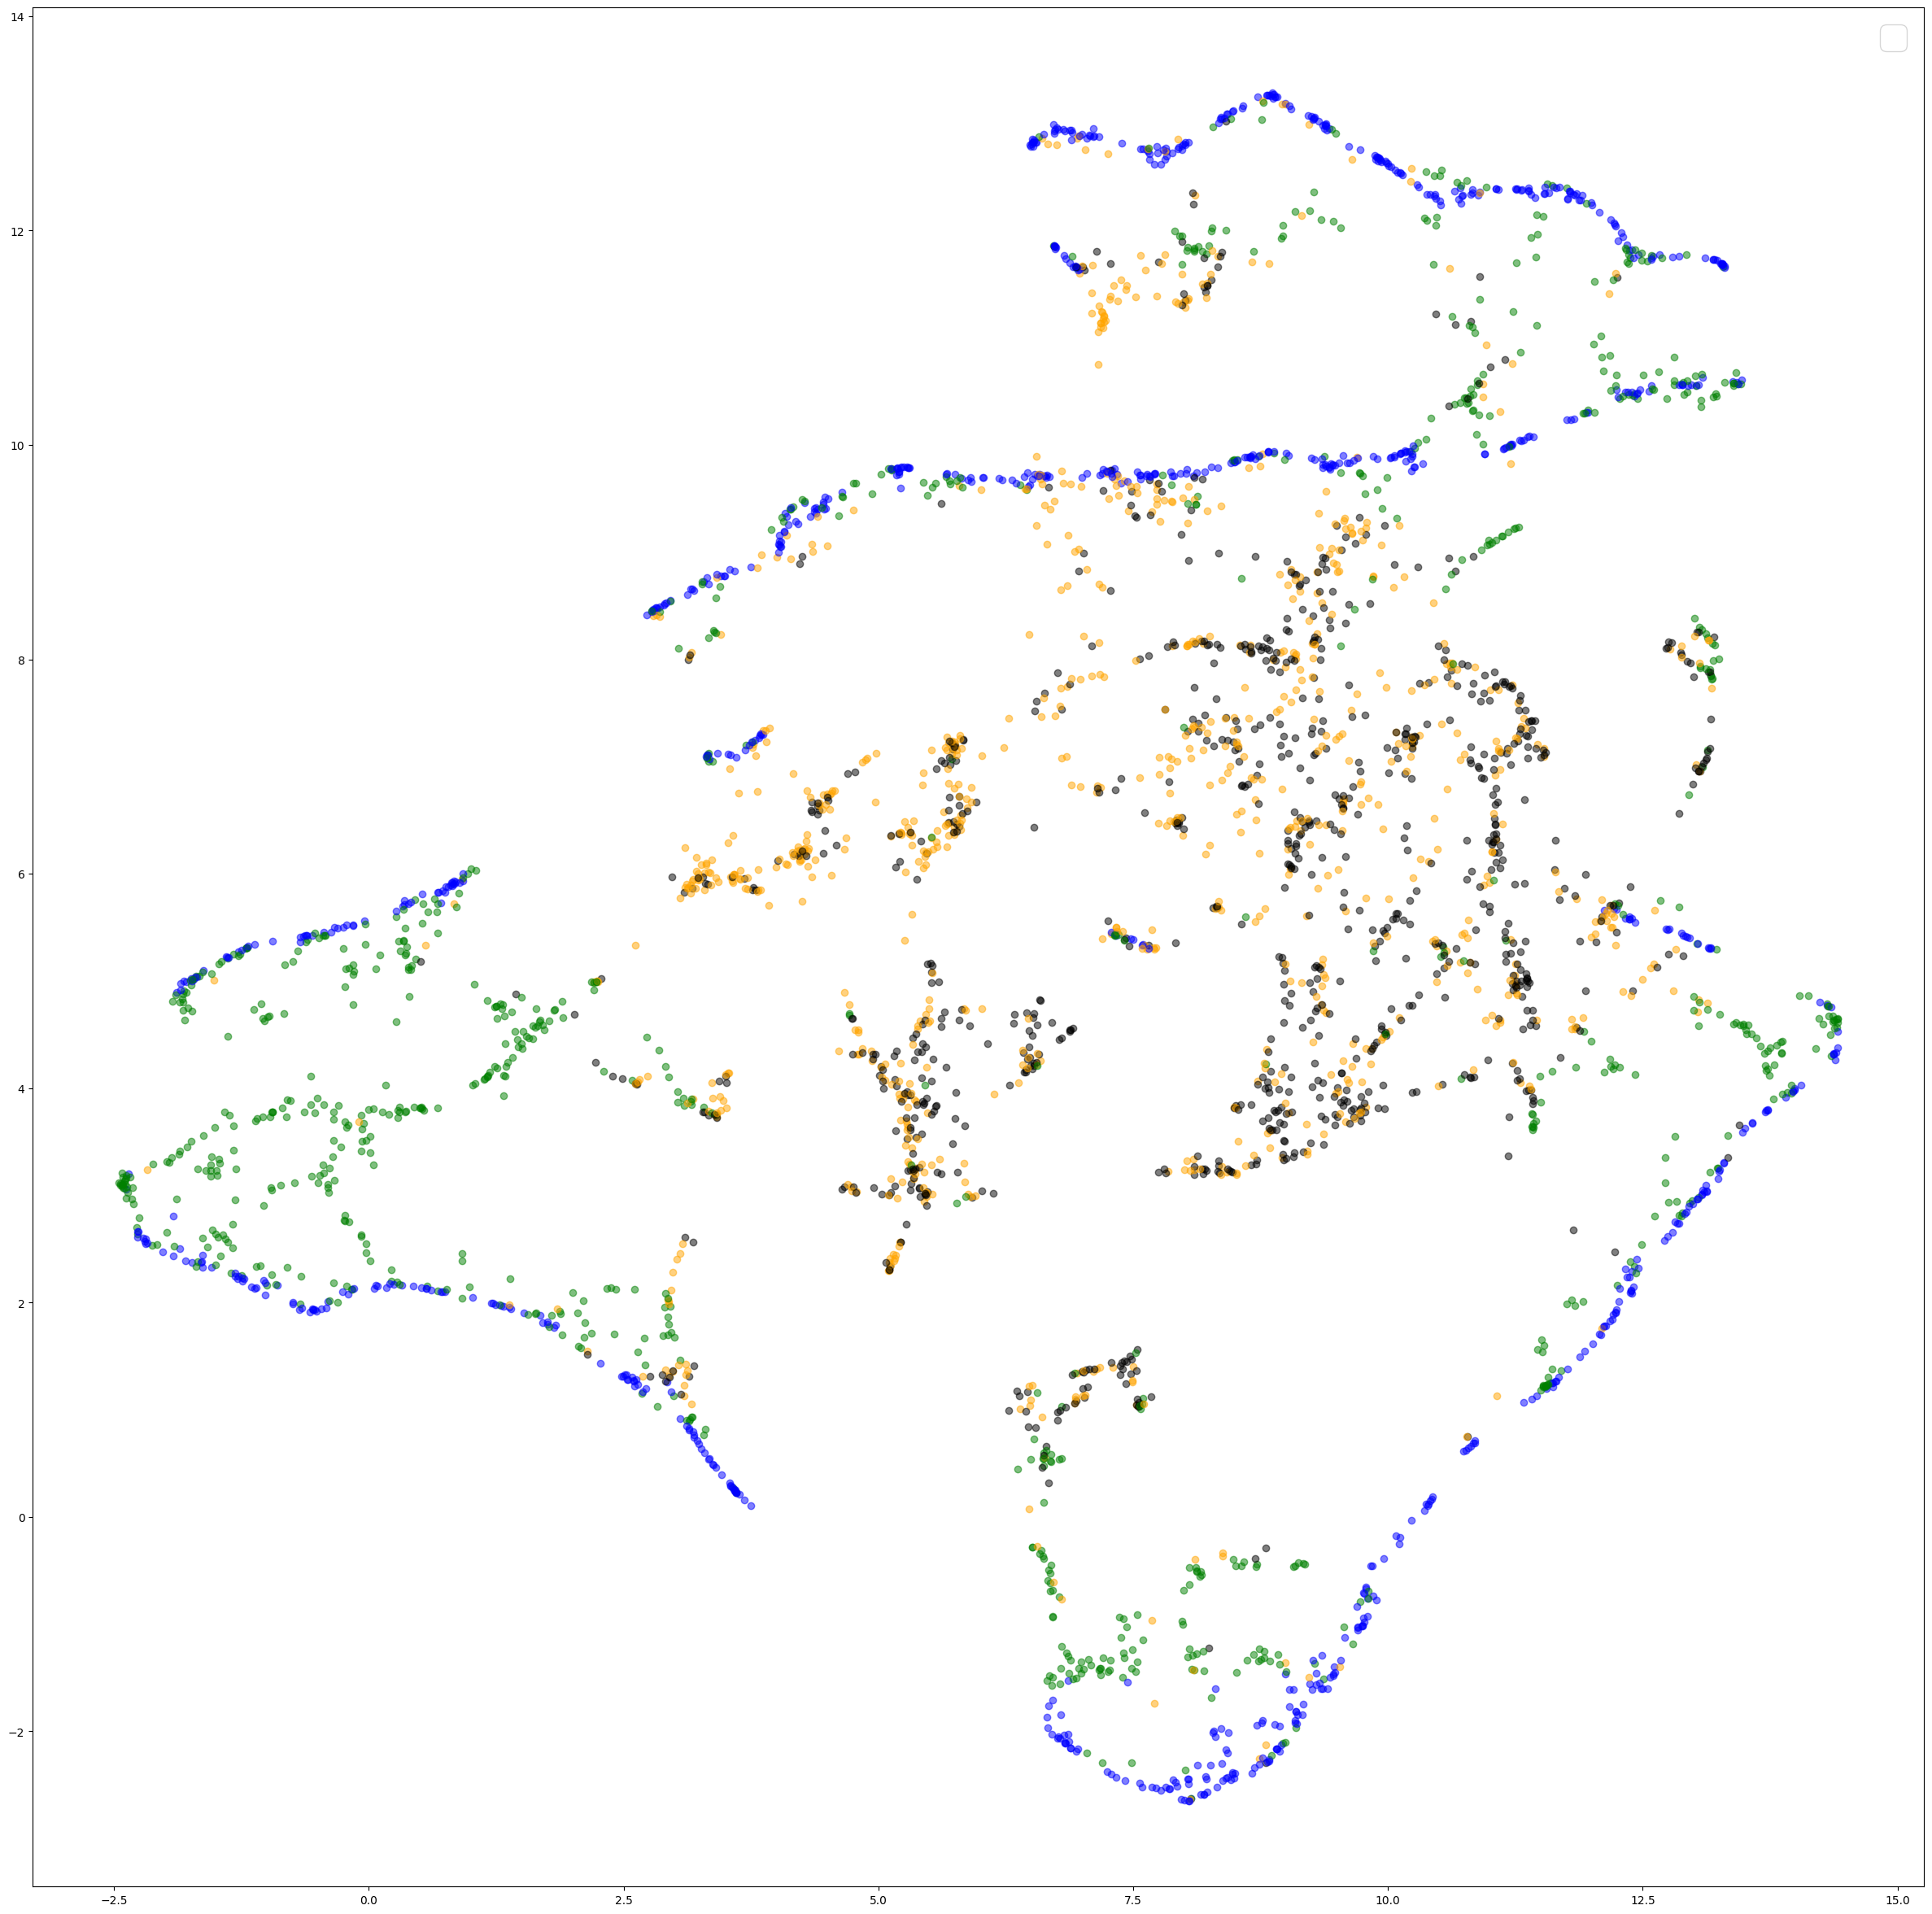

In [13]:
# 可視化
df_box_random_shape['axis0'] = umap_result[:, 0:1]
df_box_random_shape['axis1'] = umap_result[:, 1:2]

df_box_random_shape.to_csv('../temp/result_sample.tsv', sep='\t', index=False, encoding='shift-jis')

colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

for shape_int, col0, col1 in zip(df_box_random_shape['shape_int'], df_box_random_shape['embed_ax0'], df_box_random_shape['embed_ax1']):
    plt.scatter(col0, col1, color=colors[shape_int], alpha=0.5, marker='o')

plt.legend(fontsize = 30)

In [15]:
df_box_random_shape.to_csv('../temp/result_xy_umap.tsv', sep='\t', index=False, encoding='shift-jis')

In [8]:
df_result = pd.read_csv('../temp/result_sample.tsv', delimiter='\t', encoding='shift-jis')
df_result

,stroke_id,time,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,ptx_mm_slide_expand,pty_mm_slide_expand,...,140*140_img_vector,drawing_id,year,month,day,motif,times,name,embed_ax0,embed_ax1
0,2700,1277,Straight,102.666667,1,114.888922,"[125.47500000000002, 127.53750000000002, 130.3...","[202.2375, 202.01250000000002, 202.20000000000...","[0.0, 0.4617137374827735, 0.923427474965547, 1...","[0.8562691131498257, 0.8059003417881158, 0.755...",...,[1. 1. 1. ... 0. 0. 0.],292,2015,4,16,紙箱,1,冨山恭子,-4.238838,-4.161974
1,1476,1134,Complex,98.814815,3,103.597450,"[72.67500000000001, 74.77500000000003, 75.5250...","[203.77500000000003, 205.95000000000002, 206.3...","[190.7339449541283, 192.06591913013926, 193.39...","[215.13761467889915, 216.517159361196, 217.896...",...,[1. 1. 0. ... 0. 0. 0.],50,2013,5,13,紙箱,2,高田麻央,-0.542709,3.842469
2,476,661,Hatching,87.700000,4,117.137892,"[340.8, 339.4875, 337.575, 334.98749999999995,...","[58.499999999999986, 58.72500000000001, 59.662...","[420.0, 418.2110259218692, 416.4220518437384, ...","[63.534136546184506, 63.84081781672124, 64.147...",...,[0. 0. 0. ... 0. 0. 0.],3,2013,4,18,紙箱,1,井原亜利紗,2.569970,4.671750
3,122,334,Complex,58.695652,3,86.603068,"[149.025, 147.86249999999998, 146.549999999999...","[113.2875, 112.725, 111.975, 111.1875, 111.149...","[149.89399293286291, 146.60777385159028, 143.3...","[84.59363957597175, 83.00353356890469, 81.4134...",...,[0. 0. 0. ... 0. 0. 0.],21,2013,4,18,紙箱,1,高田麻央,2.249853,-0.792930
4,47,57,Simple curve,44.000000,2,16.668141,"[58.91250000000002, 58.53750000000002, 58.3500...","[177.90000000000003, 179.73750000000004, 181.3...","[21.954545454545745, 21.864493996569728, 21.77...","[0.0, 0.4412521440826822, 0.8825042881646409, ...",...,[0. 0. 0. ... 0. 0. 0.],50,2013,5,13,紙箱,2,高田麻央,14.312058,3.886367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,1198,492,Complex,113.217391,3,151.889159,"[214.95000000000002, 216.5625, 215.6625, 206.4...","[178.8, 178.875, 178.875, 178.8, 178.95, 180.0...","[365.720338983051, 367.6334745762713, 369.5466...","[0.0, 0.08898305084737669, 0.17796610169475338...",...,[0. 0. 0. ... 0. 0. 0.],308,2015,4,27,紙箱,2,冨山恭子,2.131432,4.449835
3764,371,154,Straight,31.076923,1,49.852583,"[298.3875, 311.925, 324.0, 327.1875, 330.075, ...","[155.54999999999998, 148.8375, 142.275, 140.66...","[0.0, 0.45778985507272213, 0.9155797101448907,...","[218.03478260869556, 217.80778985507234, 217.5...",...,[0. 0. 0. ... 0. 0. 0.],955,2016,5,2,紙箱,1,saito,-2.679842,-2.913120
3765,1403,811,Simple curve,90.800000,2,38.976669,"[295.2, 297.45, 297.375, 290.28749999999997, 2...","[141.0375, 141.225, 141.375, 141.8624999999999...","[392.4590163934426, 392.9597615499257, 393.460...","[0.0, 0.0417287630402005, 0.083457526080401, 0...",...,[0. 0. 0. ... 0. 0. 0.],957,2022,6,13,紙箱,3,saito,1.129935,12.454768
3766,298,152,Straight,91.714286,1,57.150758,"[140.925, 144.03750000000002, 142.5, 126.52500...","[155.70000000000002, 153.9, 154.9125, 168.375,...","[386.64114832535876, 387.2065525910306, 387.77...","[19.291866028708256, 18.964885248560723, 18.63...",...,[0. 0. 0. ... 0. 0. 0.],308,2015,4,27,紙箱,2,冨山恭子,1.887452,10.113582
